# 1. Reading the datasets

Authentication of the user to access the google drive

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
https://drive.google.com/file/d/1zhhuNTbRz8bxaZV5ptzg61s_KKHPsYen/view?usp=sharing
https://drive.google.com/file/d/18dp8EcINfrOSuWuHpyaJ9c1ALsTVEJn5/view?usp=sharing

Getting the content of the files 

In [3]:
Test_set_file = drive.CreateFile({'id':'1zhhuNTbRz8bxaZV5ptzg61s_KKHPsYen'})
Train_set_file = drive.CreateFile({'id':'18dp8EcINfrOSuWuHpyaJ9c1ALsTVEJn5'})
Test_set_file.GetContentFile("test.csv")
Train_set_file.GetContentFile("train.csv")

# 2. Importing the packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

# 3. Reading the train dateset

In [5]:
Train_df = pd.read_csv('train.csv')

In [6]:
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Columns

In [7]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Type of the columns

# 4. Missing values

## 4.1 Checking the missing values 

In [8]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missingno Visualization')

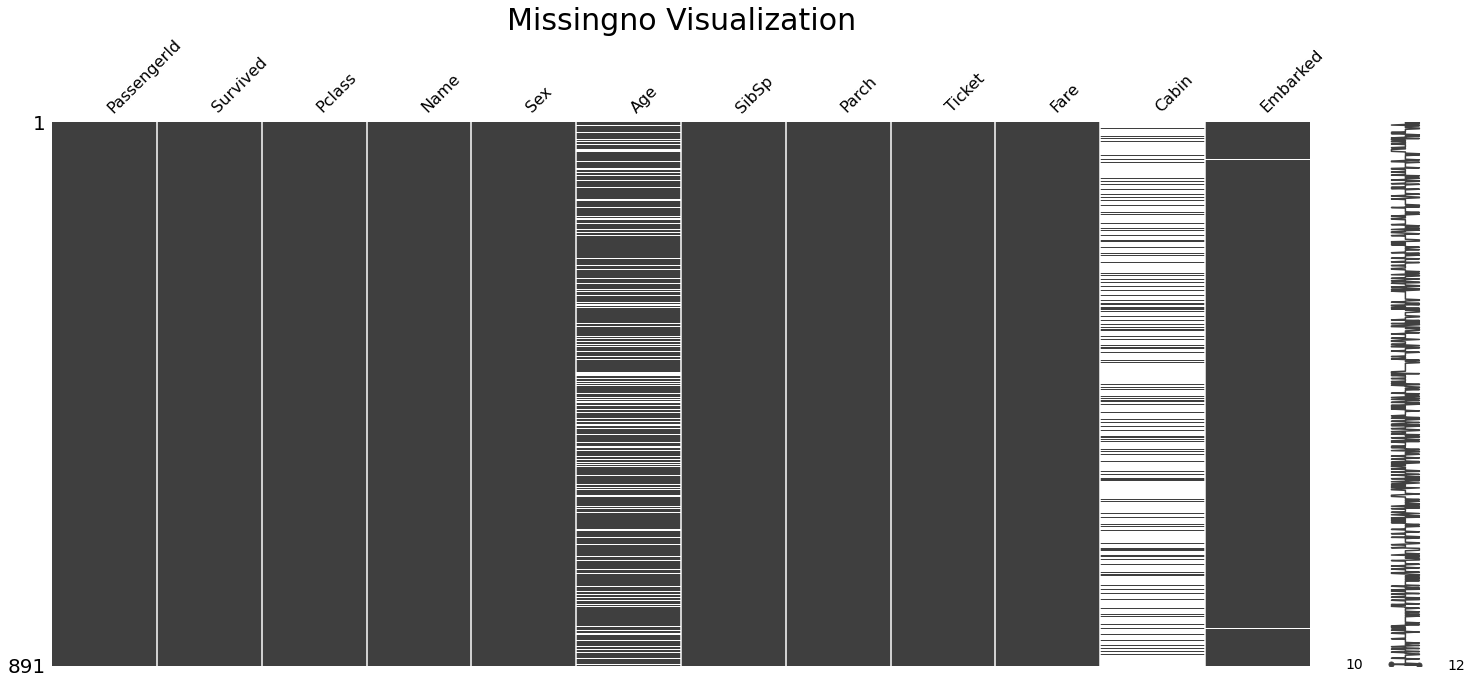

In [9]:
msno.matrix(Train_df)
plt.title('Missingno Visualization', fontsize=30)

* **Note:** We have missing values in these columns: **'Age', 'Cabin', 'Embarked'**

Taking a closer look to these columns

Text(0.5, 1.0, 'Missingno Visualization')

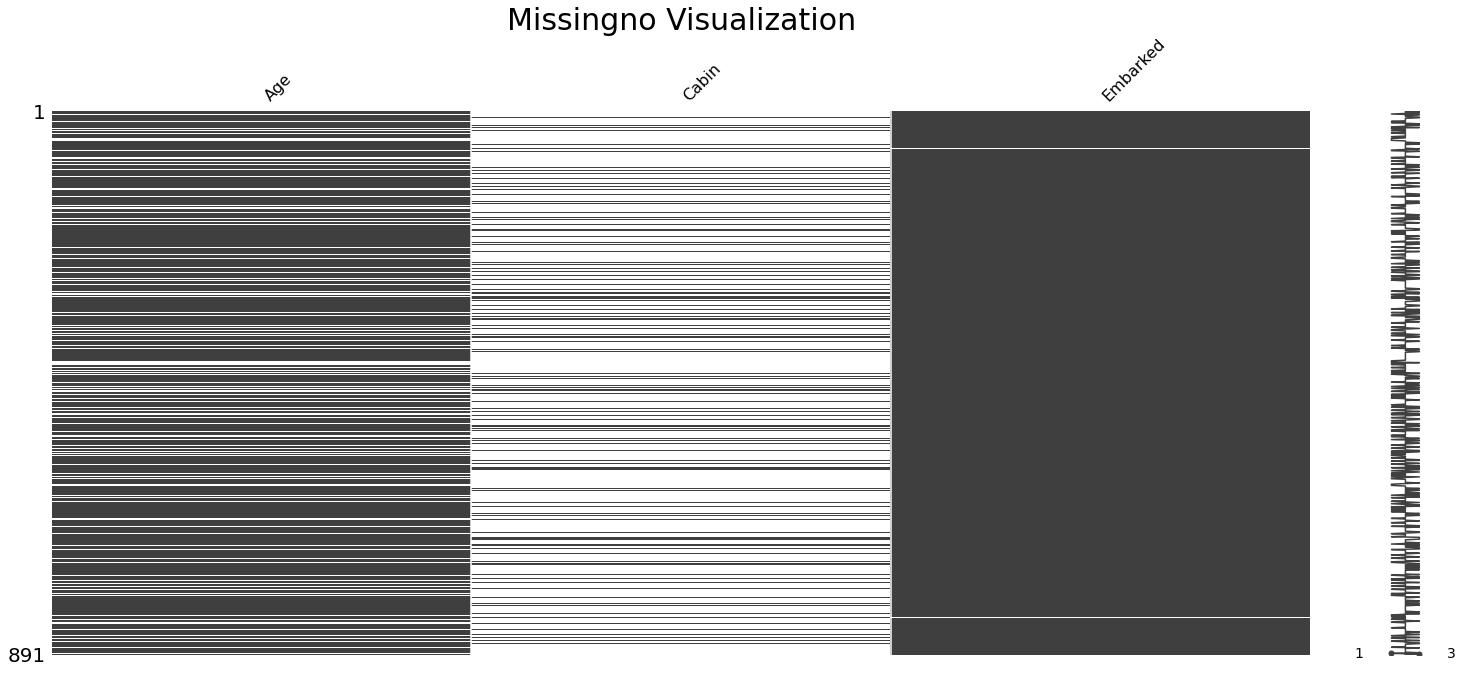

In [10]:
msno.matrix(Train_df[['Age', 'Cabin', 'Embarked']])
plt.title('Missingno Visualization', fontsize=30)

Checking the percentage of the missing values

In [11]:
round(Train_df[['Age', 'Cabin', 'Embarked']].isnull().sum()/Train_df.shape[0]*100, 2)

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

In [12]:
Contained_miss_cols = ['Age', 'Cabin', 'Embarked']
for col in Contained_miss_cols: 
  print(f"In the column {col} {round(Train_df[col].isnull().sum()/Train_df.shape[0]*100, 2)}% are missed. ")

In the column Age 19.87% are missed. 
In the column Cabin 77.1% are missed. 
In the column Embarked 0.22% are missed. 


* **Note:** As we are having more than 50% missing values in the **'Cabin'** column, the best approach for this column is to drop the whole column. 

Dropping the **'Cabin'** column from the dataset

In [13]:
Train_df.drop('Cabin', inplace = True, axis = 1)
Train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## 4.2 Handling the missing values

### 4.2.1 Removing

In [14]:
Removed_missed = Train_df.dropna()
Removed_missed.info()
print('-' * 30 )
print('Number of missing values in each column: ', end = '\n\n')
Removed_missed.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB
------------------------------
Number of missing values in each column: 



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.2.2 Imputing

Taking the columns that are containing at least one missed value.

In [15]:
Column_missed = Train_df.columns[Train_df.isnull().any()]
Column_missed

Index(['Age', 'Embarked'], dtype='object')

#### 4.2.2.1 **Most frequent approach**

In [16]:
Imputed_df_most_frequent = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy= "most_frequent")
imputed_temp = imp.fit_transform(Train_df[Column_missed])
Imputed_df_most_frequent[Column_missed] = imputed_temp

In [17]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


* **Note:** When we use the **most_frequent** approach we will get a string like of the values. As this approach can be both use for numeric and string like values. 

We need to convert the values again from the string to float values in 'Age' column. 

In [18]:
Imputed_df_most_frequent['Age'] = Imputed_df_most_frequent['Age'].astype(float)

In [19]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Looking at the percentile of the values in each column.

In [20]:
Imputed_df_most_frequent.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Chceking the missed values again 

In [21]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### 4.2.2.2 **Mean approach**

In [22]:
cat_col = [col for col in Train_df.columns if Train_df[col].dtype == 'object']
num_col = [col for col in Train_df.columns if Train_df[col].dtype != 'object']
display(cat_col)
display(num_col)

['Name', 'Sex', 'Ticket', 'Embarked']

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [23]:
Imputed_df_mean = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_temp = imp.fit_transform(Train_df[['Age']])
Imputed_df_mean[['Age']] = imputed_temp

Looking at the percentile of the values in each column.

In [24]:
Imputed_df_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the missed values again 

In [25]:
Imputed_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### 4.2.2.3 **Median approach**

Looking at the percentile of the values in each column.

In [26]:
Imputed_df_median = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy="median")
imputed_temp = imp.fit_transform(Train_df[['Age']])
Imputed_df_median[['Age']] = imputed_temp

In [27]:
Imputed_df_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the missed values again 

In [28]:
Imputed_df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### 4.2.2.4 **KNN multivariate approach**

In [30]:
Imputed_df_knn = Train_df.copy()
imp = KNNImputer(n_neighbors=5, missing_values=np.nan)
cols = ['Fare', 'Age', 'Parch', 'SibSp']
Imputed_temp = imp.fit_transform(Train_df[cols])
Imputed_df_knn[cols] = Imputed_temp

In [31]:
Imputed_df_knn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.094880,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.497779,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
Imputed_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


# 5. Duplicate values

In [33]:
Duplicated = pd.concat([Train_df[:5], Train_df[:5]])

In [34]:
Duplicated.duplicated()

0    False
1    False
2    False
3    False
4    False
0     True
1     True
2     True
3     True
4     True
dtype: bool

In [35]:
print("The number of duplicated values:", Train_df.duplicated().sum())

The number of duplicated values: 0
